<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/2021/notebooks/Python_misc_interpolation_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 補間と数値積分




In [ ]:
import copy 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
!pip install japanize_matplotlib
import japanize_matplotlib

##補間

補間/内挿(interpolation)とは、既知の離散的な点列をもとに  
点列の間の各点の値を見積もったり、連続的な関数としての表現を与えることの総称である。

たとえば、夏休みの宿題でアサガオの観察日記をつけることにしたAさんが、  
毎日最高気温もあわせて記録していたとする。

ところが、お盆で祖父母の家に帰った3日だけ、測定をさぼってしまった。  
そんなとき、お盆前までとお盆以降の測定結果から  
お盆期間の温度を見積もることは、
[内挿]を考えていることに相当する。

### 線形補間

誰でもすぐに思いつく方法は、既知の点を直線で結んで間の点の値を補うことであり、  
これは線形補間や１次補間と呼ばれる。

線形になる機構がわかっている場合を除いて、測定し忘れたデータを線で補間した結果が正しい保証はまったくないのだが、とにかくやってみよう。

[気象庁の東京の2020年8月の気象データ](https://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2020&month=8&day=&view=)から、最高気温を例にとってみよう。

手で入力するのではなく、スクレイピングしてみよう。
DataFrameの使い方については別のノートブックを参照のこと。




In [ ]:
url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2020&month=8&day=&view='
df = pd.read_html(url)[0] #0番目がほしい表になっている

少々adhocだが、7列目に欲しいデータ(最高気温)があるのでndarrayにしてしまおう

In [ ]:
highT = np.array(list(df.iloc[:,7]))
print(highT)

[31.8 31.5 32.3 33.1 34.2 33.1 35.4 32.3 34.7 35.2 37.3 35.8 36.1 34.2
 36.1 35.4 36.5 34.3 34.2 34.8 36.  35.2 29.4 32.3 32.2 34.  33.6 34.5
 35.  34.9 32.6]


一方で、13-15日の測定を忘れてしまったとする。

In [ ]:
obsT = copy.copy(highT)
obsT[12] = 0.0
obsT[13] = 0.0
obsT[14] = 0.0

前後の日のデータのみを使って補間することにすると

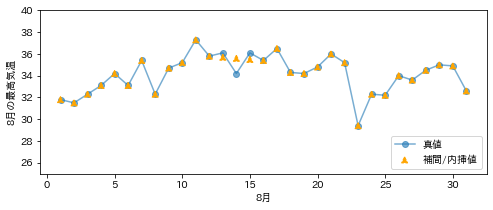

In [ ]:
def lin_interp(x1,y1,x2,y2,x):
    return ((x-x1)*y2 - (x-x2)*y1)/ (x2-x1)

xr = np.array(range(31))
xr = xr + 1
x1 = xr[11]; y1 = highT[11]
x2 = xr[15]; y2 = highT[15]

for i in [12,13,14]:
    obsT[i] = lin_interp(x1,y1,x2,y2,xr[i])

fig = plt.figure(figsize=(8,3))
plt.ylim(25,40)
plt.xlabel("8月")
plt.ylabel("8月の最高気温")
plt.plot(xr,highT,marker="o",linestyle="-",alpha=0.6,label="真値",zorder=1)
plt.scatter(xr,obsT,marker="^",linestyle="dashed",
            label="補間/内挿値",color="orange",zorder=10)
plt.legend(loc="lower right")
plt.show()
plt.close()

となる。

もちろん、最高気温は様々な要因によって決まるので  
線形補間でうまくいく保証はまったくないが、  
"内挿を考える限り"気温としてみなせないような値を出すことはあり得ない。

### スプライン補間

### ラグランジュ補間

## 数値積分

###  台形公式

### シンプソンの公式

### $\clubsuit$ ガウス求積 (gaussian quadrature) $^{(*1)}$

任意の多項式関数$f(x)$について、区間$[-1,1]^{(*2)}$に渡る定積分$I$を、  
正の整数$n$を用いて、
$I = \int^1_{-1}f(x) \simeq \sum^n_{i=1}w_i f(x_i)$  
の形でなるべく正確に(実用的には、正確かつ少ない項数nで)近似する事を考える。

$x_i$は積分点(またはガウス点)、$w_i$は重みと呼ばれる。

ガウス求積というときは通常、後述のGauss-Legendre公式を指し、  
$n$次のルジャンドル多項式の$n$個の零点([-1,1]内にある)を積分点として選ぶ。  
このとき、$w_i$を(以降の小節のように)適切に選ぶと、$f(x)$が$2n-1$次以下の場合、等号が厳密に成り立つ。  
逆に、関数$f(x)$が$2n$以上の次数を持つ多項式の場合や、多項式関数でない場合、  
上の等号は成り立たない(近似の精度が十分な場合もある)。

>*1: ガウスに因んで名付けられた数値解析の手法で、  
物理などでよく出てくるガウス積分$\int^\infty_{-\infty} dx \exp{(-x^2)} = \sqrt{\pi}$とは特別関係はない

>*2 一般には、任意の区間$[a,b]$についての積分がしたくなるが、  
区間$[-1,1]$に"標準化"するのが慣例で、多くのライブラリ等での実装もそうなっている。  
このためにはもちろん、元の変数$x$を$t = \frac{2(x-a)}{b-a }- 1 $と 変数変換をすればよい。  
具体的な表式を書いておくと...
$\int^b_a dx f(x) = \frac{b-a}{2}\int^1_{-1}dt f(\frac{b-a}{2}t +\frac{a+b}{2})$となる。


### Gauss-Legendre公式

上記の$n$個の積分点を$n$次のLegendre多項式の零点、  
つまり$P_n(x_i)=0$となる点$x_i$(i=1,...,n)に取る。  
また重みを$w_i=2/[ nP_{n-1}(x_i) P'_{n}(x_i)]$と取る。

> このノートブックではルジャンドル多項式の性質を全て網羅することはしない。  
人生で一度くらいは工学や物理などで出てくる直交多項式の漸化式などを勉強しておくと良いかも...。  
ルジャンドル多項式, エルミート多項式，ラゲール多項式， etc.  
覚えておく必要はなく、必要になった時に「アレに載ってたな...」と思い出せれば良い。  
参考: [物理のための応用数学 (裳華房)][詳解応用物理数学演習 (共立出版)]

数値積分をしてみよう。

たとえば関数$f(x)= 7 x^6 + 20x^4 + 1$を考える。  
この関数の区間$[-1,1]$における積分の値は手計算で求めることができて  
$\int^1_{-1}dx (7x^6 + 20 x^4 + 1) = [ x^7 + 4x^5 + x ]^{x=1}_{x=-1}=12 $である。


In [ ]:
#関数を定義
def f(x):
    return 7 * x**6 + 20* x**4 + 1

ルジャンドル多項式の零点を求めるには、  
numpyの中にある関数を使えばよい。

In [ ]:
import numpy as np

In [ ]:
n=6

# 零点と重みを計算する
xs,ws = np.polynomial.legendre.leggauss(n)

print("次数",n);print("零点",xs);print("重み",ws)
# s = f(xs[0])*ws[0] + f(xs[1])*ws[1] + ...
s = np.dot(f(xs),ws) # numpyのブロードキャストで1行で書ける
print("数値積分の結果", s)

次数 6
零点 [-0.93246951 -0.66120939 -0.23861919  0.23861919  0.66120939  0.93246951]
重み [0.17132449 0.36076157 0.46791393 0.46791393 0.36076157 0.17132449]
数値積分の結果 11.999999999999979


In [ ]:
for n in range(1,6):
    xs,ws = np.polynomial.legendre.leggauss(n)
    print("n=",n, " 積分値 ", np.dot(f(xs),ws))

n= 1  積分値  2.0
n= 2  積分値  6.962962962962962
n= 3  積分値  11.680000000000003
n= 4  積分値  11.999999999999993
n= 5  積分値  12.00000000000001


次数を下げて$n=4$程度でも、つまりたった4つの積分点で  
積分値を高精度に近似できていることが分かる。


# LICENSE


Copyright (C) 2021 Sota Yoshida

[ライセンス:クリエイティブ・コモンズ 4.0 表示 (CC-BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.ja)